# Boston House Prices

### Introduction



In this notebook I am looking at the well known Boston House Prices dataset. This notebook is broken up into three sections. I will be using Python to:

       1. Explore and describe the dataset.
       2. Investigate whether there is a significant difference in median house
          prices between those on the Charles river and those that aren't.
       3. Create a neural network that can predict the median house price based 
          on the other variables in the dataset. 
***

## 1 . The Boston House Prices Dataset

### Background

The data contained in the Boston House Price Dataset was published by David Harrision, Jr. and Daniel L. Rubenfield in 1976 as part of their paper:
 _"Hedonic Housing Prices and the Demand for Clean Air"_ [Ref I JOURNAL OF ENVIRONMENTAL ECONOMICS AND MANAGEMENT 5, 81-102 PDF](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf)

In their paper they investigate the problems associated with using housing market data to investigate people's willingness to pay for cleaner air. Their study uses data drawn from the census tracts in the Boston Standard Metrepolitan Statistical Area in 1970. It focuses on a dependent variable, the median value of owner-occupied homes in 506 areas of Boston. 



### Importing and preparing the dataset

I import the Python Libraries for this notebook in the cell below.

In [1]:
# Import of all the python libraries required for this notebook and 
# setting of plotting parameters for the notebook
# Matplotlib had to be upgraded to overcome an issue with heatmaps.

# for dataframes
import pandas as pd
# for numerical arrays
import numpy as np
# for plotting
import matplotlib.pyplot as plt
# for plotting
import seaborn as sns

# for neural networks
import keras as kr
# for stats 
from scipy import stats
# to preprocess data set
import sklearn.preprocessing as pre
# to split the data set
import sklearn.model_selection as mod
# to  whiten the dataset
import sklearn.decomposition as dec


# reset default figsize for notebook
from matplotlib import rcParams
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
#pd.options.display.max_rows = None



Using TensorFlow backend.


The dataset is readily available in Python. I imported it from the Sklearn package. I converted it to a dataframe to work with. I also added the dependent variable MDEV to the dataset and called it PRICE, in the cell below.

In [2]:
# import and preparation of the Boston house price dataset for analysis
# adapted from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
# and adapted from Ref II (https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef)

from sklearn.datasets import load_boston
bostonds = load_boston()  #bostonds is a dictionaray

# Convert to a pandas dataframe
boston = pd.DataFrame(bostonds.data)
# Add the feature_names from the bostonds dictionary as columns
boston.columns = bostonds.feature_names
# Add the target attribute, the price, from the dictionary to the dataframe
boston['MDEV'] = bostonds.target

The dataset contains 506 rows and 14 columns. In the cell below I am running a quick 
check to ensure there are no null values in the data, and there are none.

In [3]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MDEV       0
dtype: int64

A look at first few rows of the dataset and what data they contain:

In [4]:
boston.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MDEV  
0       15.3  396.90   4.98  24.0

### Exploring the Boston Housing dataset

The data in the dataset is made up of 506 rows each representing an area in Boston. The dependent variable MDEV is the median value of owner-occupied homes for each specific area.

There are 13 further independent variables in the dataset. These are made up of two structural variables (RM, AGE); eight neighbourhood variables (CRIM, ZN, INDUS, CHAS, TAX, PTRATIO, B, LSTAT); two accessibility variables (DIS, RAD);  and one air pollution variable (NOX) (Ref I).

I have compiled a description of each attribute in the dataset in order below:

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per \$10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MDEV     Median value of owner-occupied homes in \$1000's (1970's prices)

The above information taken from the output of running the descr command below:
#print(bostonds.DESCR)

In the cell below we can see how the median value of homes is distributed. 


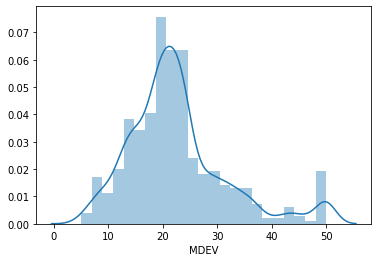

In [5]:
# histogram MDEV
sns.distplot(boston['MDEV'])

MDEV appears to be normally distributed, but slightly skewed to the high end. 

It's worth noting that there must have been a cap of 50.0 for MDEV values and these must include values above 50.0 as there are 16 MDEV's of this value. The next most frequent MDEV to appear was 25.0 and there only only 8 of these. 

The frequency of each unique value in MDEV was calculated below:

In [6]:
# get the frequency each unique values appears in MDEV
boston['MDEV'].value_counts().sort_values()

13.0     1
28.0     1
33.0     1
14.2     1
16.0     1
        ..
22.0     7
21.7     7
23.1     7
25.0     8
50.0    16
Name: MDEV, Length: 229, dtype: int64

A quick look at the summary stats for each variable in the dataset in the cell below.

In [7]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Next I will look at the realtionship between each of the independent variabes in the dataset and MDEV. In the heatmap below values with a corrleation coefficient (cc) close to 1 have a strong positive correlation; those values close to -1 have a strong negative correlation ie when these go up MDEV goes down and vice-versa: & those with correlation coefficients close to 0 have little correlation to MDEV.

The variables mostly appear to the have relationships we would expect with MDEV. 

Structural Variables:  
RM, represents spaciousness (the average number of rooms per owner unit) has a strongly positive correlation with house values of 0.7, bigger houses are worth more. Age is the proportion of houses over 30 years old. Age is related to the structual quality of homes. It is as expected negatively correlated with house values. 

Neighbourhood Variables negatively correlated with MDEV    
CRIM:  -.39;  INDUS  -.48;  TAX  -.47;  PTRATIO  -.51  LSTAT:  -.74   
I would expect all of the above to have a negative correlation. INDUS is the proportion of non-retail business acres in the area. It is noise, heavy traffic etc from the industry that affect house prices negatively. A lower pupil teacher ratio is a measure of the public sector benefit in each area. The lower the ratio the higher the perceived public sector benefit.

Neigbourhood Varialbes positvely correlated with MDEV:  
ZN   .36  CHAS   .18  B   .33
None of these are strongly corrleated with MDEV on their own. ZN is the proportion of residential land zoned for lots greater than 25k square feet, because these would restricts the building of small houses, I would expect a strong positive correlation. 372 areas had no lots of this size however reducing its correlation with house values. 

Access variables:  
DIS  .25  RAD  -.38
DIS as expected has a positive variance to home values as it would be more desirable to live closer to the employment centres. RAD has a negative correlation with MDEV. It is the index of accessiblity to Radial Highways and has location advantages I would have expected a positive relationship with MDEV, however access to the Radial Highways might imply these areas are on the outscirts of Boston, where residents face longer commutes etc. and residential develompment land is cheaper.

The code for the heatmap is in the cell below:

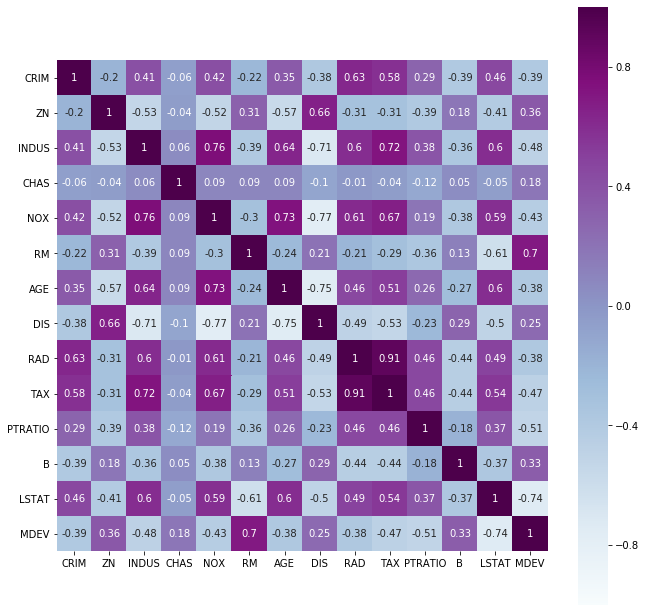

In [8]:
# heatmap
corr = boston.corr().round(2)
plt.figure(figsize=(11,11))
ax = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, cmap='BuPu', center=0,square=True, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

Crime rates had a lower impact on the median values of homes than I expected. I am graphing these below against MDEV to take a closer look.

From the graph it appears that crime isn't a major issue in Boston. Where crime rates are low there appears to be almost no impact on MDEV, the impact only comes in the rare instances when crime rates rise to a significant level.

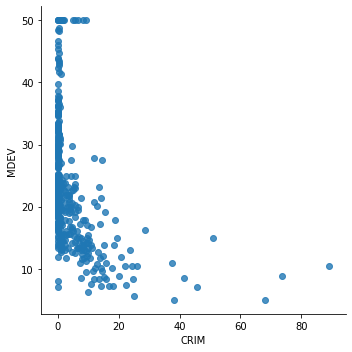

In [9]:
# Plot BMI classification by gender
sns.lmplot('CRIM', 'MDEV', data=boston, fit_reg=False)

To complete the data exploration of this dataset. I am going to briefly focus on the  on the independent variables  strongly correlated with medain home values LSTAT, RM, INDUS, PTRATIO.

I have included MDEV in the boxplots below. All but INDUS and PTRATIO have significant outliers.

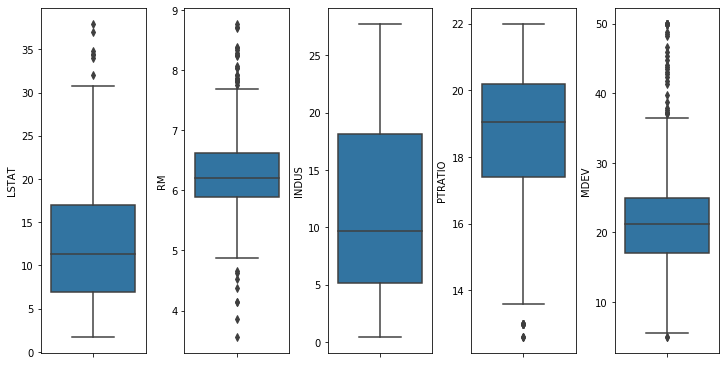

In [10]:
#boxplot method extracted from Ref III (https://www.kaggle.com/prasadperera/the-boston-housing-dataset)
keyVar = boston[['LSTAT','RM','INDUS','PTRATIO','MDEV']]
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(10,5))
index = 0
axs = axs.flatten()
for k,v in keyVar.items():
    sns.boxplot(y=k, data=keyVar, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In the  plots below we can see each of these variables are related to each other. Diagnolly from left to right we can see how each is distributed in their histograms. LSTAT's strong negative correlation, and RMs strong positive correlation with MDEV are evident in the two graphs first two pairplots on the bottom column. 

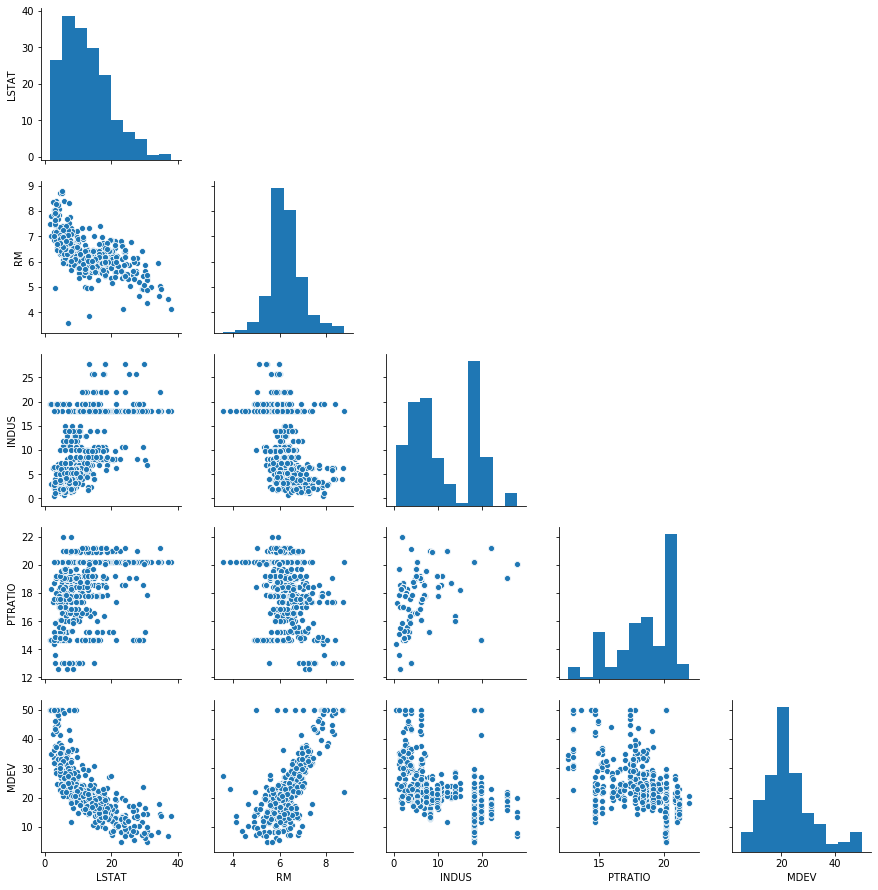

In [11]:
# method for half pairplot extracted from: Ref IV (https://stackoverflow.com/questions/34087126/plot-lower-triangle-in-a-seaborn-pairgrid
#sns.pairplot(keyVar)

g = sns.pairplot(keyVar)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

***

## 2 . Is There A Significant difference In Median House Prices Between Those On The Charles And Those Not On The Charles River?


The attribute CHAS is a boolean those on the Charles river have a value of one and those areas not on the Charles have a 
value of 0. For simplicity I have created 2 new datasets from the Boston Housing dataset above: 

OnCharles - contains those areas along the Charles river. There are 35 areas in this dataset. The median MDEV is 23.3 and the mean is 28.4.
NotOnCharles - contains all areas that don't bound the Charles river. There are 471 of these. The median value for MDEV is 20.9 and the mean is 22.1.

First let's look at MDEV:

In the cell below I have created two boxplots to visualise the median house prices. From the plots and the means and medians of MDEV of each dataset it appears to be evident that owner-occupied houses in the areas along the river have higher prices. This is as we would expect as in most cities there is a nicer quality of life living along the river, and neighbourhoods are often more expensive.

Text(0.5, 1.0, 'On the Charles')

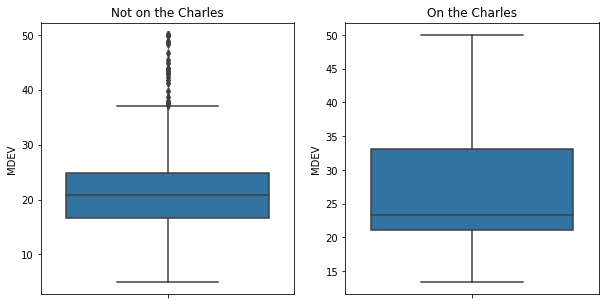

In [12]:
#Split the boston dataset into 2 new dataframes one containing the areas on the Charles and the other those 
#areas not on the Charles
onCharles = boston[boston['CHAS']==1]
notOnCharles = boston[boston['CHAS']==0]

# Create two boxplots side by side of the MDEV for houses on the Charles and those not on the Charles
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
index = 0
axs = axs.flatten()
sns.boxplot(y=notOnCharles['MDEV'], ax=axs[0]).set_title("Not on the Charles")
sns.boxplot(y=onCharles['MDEV'], ax=axs[1]).set_title("On the Charles")

In [13]:
onCharles['MDEV'].describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MDEV, dtype: float64

In [14]:
 notOnCharles['MDEV'].describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: MDEV, dtype: float64

#### Median or Mean?  

The MDEV is the median home value of different populations. Each sample is a median for that distinct area. For comparitive purposes it is the mean median value of MDEV between those areas on the river and those not on the river that I am comparing.

To infer a significant difference between the means of the two populations I need to perform an infernetial statistical test. 

Initially I beleived an independent t-test would be the best to use, but both populations didn't satisfy all the assumptions necessary, specifically the homogenity of variances assumptions. Welch's t-test does not require a homogenity of vairances. (Ref V)

The Welch t-test is a nonparametric univariate test that tests for a significant difference between the mean of two unrelated groups. (Ref VI)

The hypothesis I am testing is:  

Null hypothesis: that the mean of MDEV on the Charles river is equal to the mean of MDEV not on the Charles river.
Alternate hypothesis: that the mean of MDEV on the Charles river is not equal to the mean of MDEV not on the Charles river.

If the p-value is less tha 0.05 we can reject the null hypothesis.

I conduct the Welch test in the cell below:

In [15]:
# Ref VII - equal_var https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
stats.ttest_ind(notOnCharles['MDEV'],onCharles['MDEV'] , equal_var=False, axis=0)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

#### Conclusion

The p-value of 0.003 is significant. I can reject the null hypothesis. I can infer there is a statistically significant difference in mean MDEV between the two populations. Therefore there is a significant difference in median between houses on the Charles river and those not on the Charles river.

***

## 3 . Creating a neural network to predict median house prices based on the other variables

#### Introduction 

In this section of the notebook I am going to use Keras to build a neural network, a machine learning model, to predict the MDEV based on the other variables in the dataset.

Keras is a library in python that helps to build a neural network. In this notebook Keras is sitting on top of and interfacing with Tensorflow to build the neural network. Keras acts as an interface with Tensorflow and makes the building of the neural network much easier. Neural networks are part of machine-learning. Machine-learning is a subset of AI. In machine learning a system is not programmed but trained. This is done by presenting a computer with many examples relevant to a task, it then finds statistical structure in the examples that allow the system to come up with rules i.e. with the data and the answers the computer comes up with the rules. 


##### Neural Network components
Neurons:  
Are computational units with inputs , weights and an activation function. They take the inputs and transform them into a single output using an activation function. The weight or bias determines how important each neuron is.

Layers:  
Layers are rows of neurons. The model I am using is a Sequential one, which is a linear stack of layers.

Loss function:  
This evaluates the weight, and is how the network measures how it's doing and how it steers itself in the right direction.

Optimiser:  
The way in which the loss is used to update the parameters.

Activation function:  
Introduces non-linear properties to the neural network.

Metrics:  
Any measure we would like to collect and report on during training.

Learning:  
Involves finding the model parameters that mimimise the loss function for the traing set and its targets.


##### Steps to build a neural network
       1. Define a model, and add layers
       2. Compile the model, choosing the loss function and the optimizers.
       3. Preprocess the data if necessary.
       4. Train the model on a sample of data, chosing the number of epochs (the number of iterations over 
       the training  data) and the batch size (the size of the training sample)
       5. Make predictions. Evaluating the model on test data.
       6. Adjust the model to improve performance

##### Challenges
There are multiple options for every component within a neural network. While it takes just a few lines of code to build a network. There are many moving parts, and it takes a long time with lots of tweaks to build a network that predicts accurately on both the training and test data.

The size of the Boston dataset with only 506 samples is very small. This leaves very little data to train and test our model with, increasing the risk of overfitting.


##### Preprocessing data

Before building a model I first need to assess whether the data needs to be preprocessed in anyway. When preprocessing the data I am trying to make it more suitable for the neural network.

Neural networks can perform better when the data is normalised. I use the stander scaler to do this in the cell below. It normalises each column in the dataset to have a mean of 0 and a standard deviation of 1.

When training the network I will test both with the standard inputs and the normalised inputs.

In [16]:
# preprocessing the data
# extracted from https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/dogs.ipynb

# I used the line below to remove different varialbes to see if I could improve the training.
# inputs1 = boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
inputs1 = boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]

# normailising the data
scaler = pre.StandardScaler()
scaler.fit(inputs1)
inputs1_scaled = scaler.transform(inputs1)

#### Testing and training the neural network

When I begain working on this section of the notebook I built a neural network arbitrarily, starting with a very deep network with a lot of layers. I was able to achieve a loss of 24. I was not evaluating it correctly and it performed very poorly on the test data. Through much trial and error I came back to the network below.

The process I used when building and the network was:
- Starting with a single layer which took 13 inputs and an output layer of 1 output.
- From my first models I settled on a loss function of meansquared error and a metric of mean absolute error. Both of 
these work well with regression. Further reading led me to this conclusion.
- Through trial and error I tested optimizers for best results. I achieved best results with the Adam optimizer.
- I used the same process with activations and for a single layer I found sigmoid to be the best, with linear in the output layer. When I tested a deeper network I acheived the best results with relu in the hidden layer.
- At this point I tweaked the batch size and epochs to get the best results. The graphs in the cell below highlighted the ecpochs needed. I used the mse and mae, to decide on the best network.

Single layer: 
m1.add(kr.layers.Dense(units=13, activation='sigmoid',input_dim=13))  epochs:75  batch:16
widened:
m1.add(kr.layers.Dense(units=13, activation='sigmoid',input_dim=26))  epochs:44  batch:16
Better results were acheived with the original layer
Deepened:
I tested these with different activation functions what worked best was a combination of sigmoid and relu.
m1.add(kr.layers.Dense(units=13, activation='sigmoid',input_dim=26))  
m1.add(kr.layers.Dense(units=13, activation='relu',input_dim=26))  epochs:10  batch:14
The single layer worked better than this.
I tested widening either layer in the deeper network and I achieved no improvement.

- I then test the initial layer excluding different combinations of columns from the input, without any significant improvement.
- I repeated the above process with the normalised data.

The final keras network is built in the cell below:








Train on 404 samples, validate on 102 samples
Epoch 1/13





404/404 [==============================] - 7s 16ms/step - loss: 606.2215 - mean_absolute_error: 22.8466 - val_loss: 222.2215 - val_mean_absolute_error: 14.0197
Epoch 2/13
404/404 [==============================] - 1s 2ms/step - loss: 495.3311 - mean_absolute_error: 20.3946 - val_loss: 165.6058 - val_mean_absolute_error: 11.9443
Epoch 3/13
404/404 [==============================] - 0s 1ms/step - loss: 336.3354 - mean_absolute_error: 16.1879 - val_loss: 106.4727 - val_mean_absolute_error: 9.3233
Epoch 4/13
404/404 [==============================] - 0s 1ms/step - loss: 185.6310 - mean_absolute_error: 10.9564 - val_loss: 67.3822 - val_mean_absolute_error: 7.1735
Epoch 5/13
404/404 [==============================] - 0s 1ms/step - loss: 94.1313 - mean_absolute_error: 6.3568 - val_loss: 45.3864 - val_mean_absolute_error: 5.5845
Epoch 6/13
404/404 [==============================] - 0s 1ms/step - loss: 59.2285 - mean_absolute_

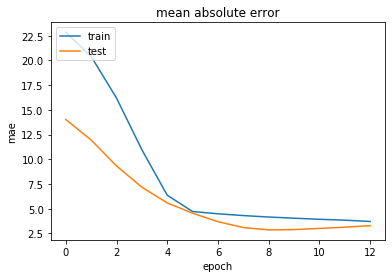

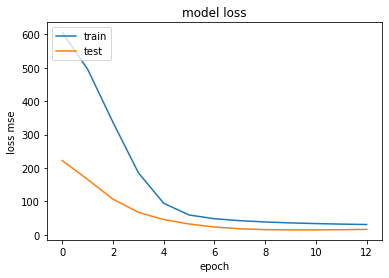

In [17]:
# build  neural network
m1 = kr.models.Sequential()
# add layers
m1.add(kr.layers.Dense(units=13, activation='sigmoid',input_dim=13))
m1.add(kr.layers.Dense(units=13, activation='relu'))
m1.add(kr.layers.Dense(units=1, activation='linear'))
# Build the model.
m1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
# inputs all independent variables in the dataset
inputs1 = boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
# ouputs the dependent variable MDEV
outputs1 = boston['MDEV']

# Train network
history=m1.fit(inputs1_scaled, outputs1, validation_split=0.2, epochs=13, batch_size=6, verbose=1)
#historyte = m1.predict(inputs_test1)
# (15.1 Access model training history)
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error' ])
plt.plot(history.history['val_mean_absolute_error' ])
plt.title( 'mean absolute error' )
plt.ylabel( 'mae' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()
# summarize history for loss
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss mse' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


In [18]:
print(history.history['val_mean_absolute_error'])

[14.019669308381921, 11.944250387303969, 9.323332702412324, 7.17347453622257, 5.5845200734979965, 4.544513660318711, 3.68126282972448, 3.0893741600653706, 2.8499904485309826, 2.884145463214201, 2.999277381335988, 3.1262084385927986, 3.2863969872979557]


In [19]:
print(history.history['val_loss'])

[222.22145978142234, 165.60575485229492, 106.47272682189941, 67.38217847487506, 45.38642406463623, 32.19521777770098, 23.21448340836693, 18.01265158022151, 15.402939705287709, 14.526830189368305, 14.682559854844037, 15.237594043507295, 16.15393956969766]


## References

I.  Hedonic Housing Prices and the Demand for Clean Air 1976  [JOURNAL OF ENVIRONMENTAL ECONOMICS AND MANAGEMENT 5, 81-102 PDF](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf)

II.  Ai Hadar: Method used to import the dataset [Medium.com](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef)

III. Box Plot - [Box plot method](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)

IV. Pair Plot [Half pair plot](https://stackoverflow.com/questions/34087126/plot-lower-triangle-in-a-seaborn-pairgrid)

V. Welch t-test [Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test#Assumptions)

VI. Welch t-test blog [Welch's t-test blog](https://pythonfordatascience.org/welch-t-test-python-pandas/)

VII. Scipy doc [Welch's t-test doc: equal_var](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

Aknowledgements:  
This course  
Books  
Deep Learning with Python Jason Brownlee  
Deep Learning with Python Francois Chollet  
https://keras.io keras documentation 

